# CS547 Group 17
Carlos Cuellar, Yuncong Geng, Kangcheng Lin, Peter Thompson
## HW2 Problem 3

In [169]:
import os
import numpy as np
import pandas
import time
#import random
import matplotlib
import matplotlib.pyplot as plt
#import scipy.stats
#from sklearn.linear_model import LinearRegression

In [170]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import functional as F

In [171]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

# 0 Preparation
### build nn in pytorch

In [203]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

### generate input data

In [204]:
def vfunc(x):
    if x < 0:
        return 0
    else:
        return 1
vfunc = np.vectorize(vfunc)

mu = 0;
sigma = 1;
N = 200;
xdata = np.random.normal(mu, sigma, N);
xdata = np.sort(xdata)
ydata = vfunc(xdata)

x_data = Variable(torch.Tensor(xdata.reshape(N,1)))
y_data = Variable(torch.Tensor(ydata.reshape(N,1)))

# 1
### 1.1 train the nn

In [206]:
learning_rate = 0.02
n_epoch = 30000; 
loss_array = np.zeros(n_epoch);

model = LogisticRegression()
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_epoch):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_data)     # Forward pass
    loss = criterion(y_pred, y_data)    # Compute Loss
    loss.backward()    # Backward pass
    optimizer.step()
    loss_array[epoch] = float(loss)

#print(model)
#print(model.linear)
m = float(model.linear.weight)
b = float(model.linear.bias)

Text(0.5, 1.0, 'Comparison between model and data')

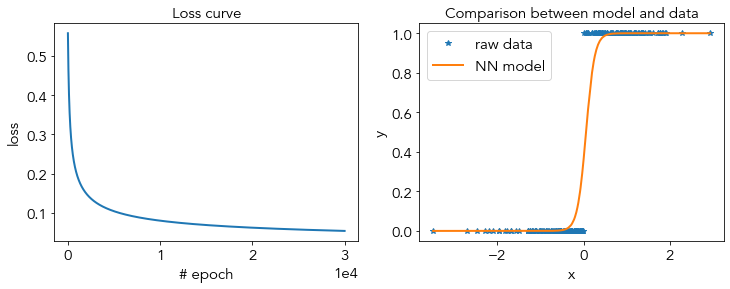

In [207]:
def logistic_func(x,m,b):
    return np.exp(m*x+b)/(1+np.exp(m*x+b))
logistic_func = np.vectorize(logistic_func);

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(n_epoch), loss_array,**plotStyles)
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.title('Loss curve')

plt.subplot(1,2,2)
plt.plot(xdata, ydata, '*',label='raw data')
plt.plot(xdata, logistic_func(xdata,m,b),'-',linewidth=2,label='NN model')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison between model and data')

### 1.2 get the width of transition layer

In [208]:
print("the width of transition layer:")
print(1/m)

the width of transition layer:
0.099574855206718


# (2)
### 2.1 flip the data

In [209]:
def flip_points(n_flips, ydata_ori):
    indices0 = np.where(ydata_ori==0)[0]
    indices1 = np.where(ydata_ori==1)[0]
    
    flip_indices0 = np.random.choice(indices0, n_flips,replace=False)
    flip_indices1 = np.random.choice(indices1, n_flips,replace=False)
    
    ydata_new = np.copy(ydata_ori);
    ydata_new[flip_indices0] = 1;
    ydata_new[flip_indices1] = 0;
    
    return ydata_new

ydata_new = flip_points(5, ydata)
y_data_new = Variable(torch.Tensor(ydata_new.reshape(N,1)))

### 2.2 train the nn

Text(0.5, 1.0, 'Comparison between model and data')

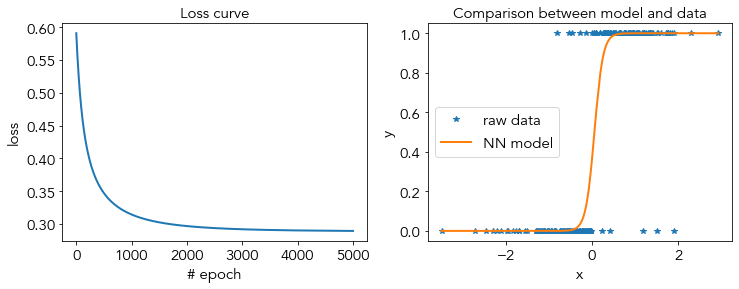

In [210]:
learning_rate = 0.02
n_epoch = 5000; 
loss_array = np.zeros(n_epoch);

model = LogisticRegression()
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_epoch):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data_new)
    loss.backward()
    optimizer.step()
    loss_array[epoch] = float(loss)
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(n_epoch), loss_array,**plotStyles)
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.title('Loss curve')

plt.subplot(1,2,2)
plt.plot(xdata, ydata_new, '*',label='raw data')
plt.plot(xdata, logistic_func(xdata,m,b),'-',linewidth=2,label='NN model')
plt.legend(loc='center left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison between model and data')

### 2.3 get the width of transition layer

In [211]:
m = float(model.linear.weight)
b = float(model.linear.bias)
print("the width of transition layer:")
print(1/m)

the width of transition layer:
0.2822888561392939


# 3

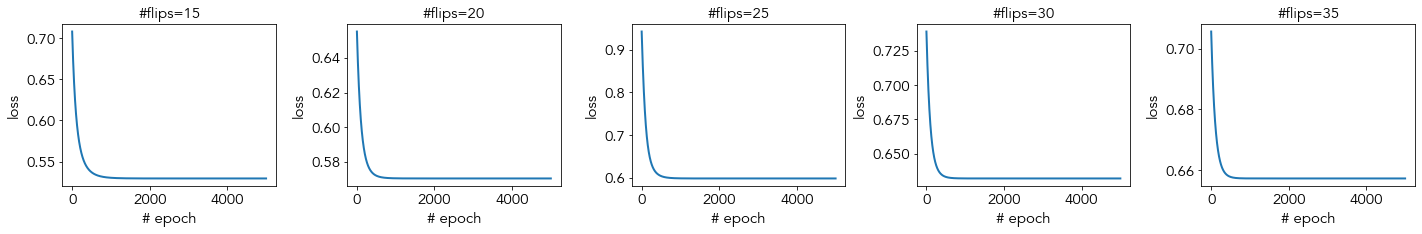

In [218]:
N_flip_array = np.array([15, 20, 25, 30, 35])
width_array = np.zeros(len(N_flip_array))

learning_rate = 0.02
n_epoch = 5000; 

plt.figure(figsize=(20,3.5))
for i in range(len(N_flip_array)):
    ydata_new = flip_points(N_flip_array[i], ydata)
    y_data_new = Variable(torch.Tensor(ydata_new.reshape(N,1)))
    
    loss_array = np.zeros(n_epoch);
    
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(reduction='mean')
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    for epoch in range(n_epoch):
        model.train()
        optimizer.zero_grad()
        y_pred = model(x_data)
        loss = criterion(y_pred, y_data_new)
        loss.backward()
        optimizer.step()
        loss_array[epoch] = float(loss)
    
    m = float(model.linear.weight)
    width_array[i] = 1/m;
    plt.subplot(1,5,i+1);
    plt.plot(range(n_epoch), loss_array,**plotStyles)
    plt.xlabel('# epoch')
    plt.ylabel('loss')
    plt.title('#flips='+str(N_flip_array[i]))
plt.tight_layout()

Text(0, 0.5, 'transition width length')

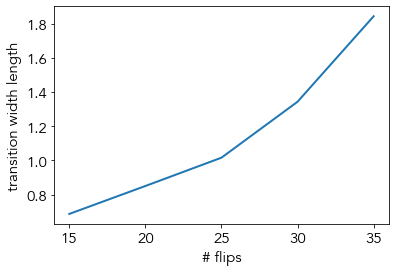

In [219]:
plt.plot(N_flip_array, width_array,**plotStyles)
plt.xlabel('# flips')
plt.ylabel('transition width length')
#plt.title('#flips'+str(N_flip_array[i]))